Date: 19.05.2023 \
Author: Reto Hendry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from functions.function_get_feature_positions import get_feature_positions
from functions.function_export_feature_positions import export_feature_positions


In [2]:
# File paths
file_paths = ["feature_importance_h2o.csv", "feature_importance_pycaret.csv", "feature_importance_tpot.csv"]

# Read and store dataframes
df_list = [pd.read_csv(file) for file in file_paths]

# Rename 'Scaled_Importance' column to include file origin
for df, path in zip(df_list, file_paths):
    df.rename(columns={'Scaled_Importance': 'Scaled_Importance_' + path.split('_')[2].split('.')[0]}, inplace=True)
    df.drop(columns=['Percentage', 'Relative_Importance'], inplace=True)

# Merge dataframes on 'Feature' column
df_merged = df_list[0].merge(df_list[1], on='Feature', how='outer').merge(df_list[2], on='Feature', how='outer')
df_merged

# Add mean of scaled importance
df_merged['Scaled_Importance_Mean'] = df_merged.loc[:,["Scaled_Importance_h2o", "Scaled_Importance_pycaret", "Scaled_Importance_tpot"]].mean(axis=1)

df_merged

,Feature,Scaled_Importance_h2o,Scaled_Importance_pycaret,Scaled_Importance_tpot,Scaled_Importance_Mean
0,16748,0.002234,0.309468,0.218379,0.176694
1,17987,0.008037,0.072295,0.051904,0.044079
2,18756,0.008288,0.068438,0.147108,0.074611
3,16560,0.008501,0.438866,0.125286,0.190885
4,17738,0.013573,0.120949,0.403059,0.179194
...,...,...,...,...,...
65,11105,0.558790,0.570562,0.423696,0.517682
66,6424,0.565678,0.734513,0.524445,0.608212
67,9689,0.685253,1.000000,0.499932,0.728395
68,9720,0.745813,0.534935,0.560653,0.613800


## sorted by mean

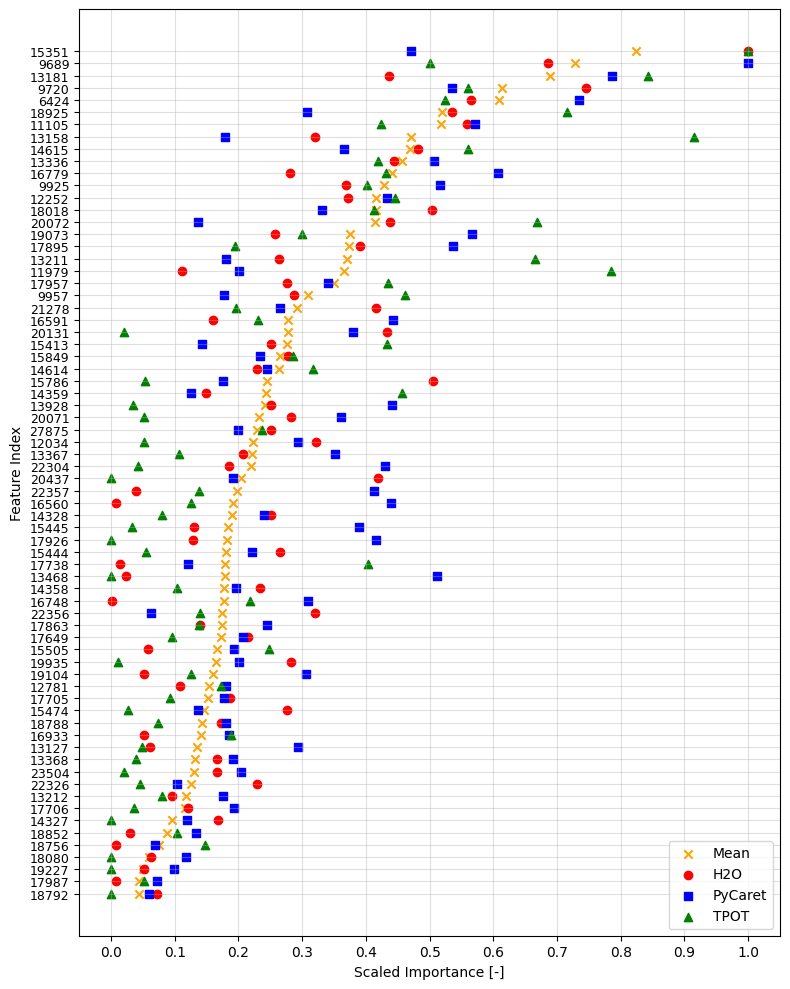

In [3]:
sort_type = "Mean"

# Sort by mean of scaled importance
df_merged = df_merged.sort_values(by=f'Scaled_Importance_{sort_type}', ascending=True)
df_merged = df_merged.reset_index(drop=True)

# horizontal scatterplot with index on the y axis with matplotlib
fig = plt.figure(figsize=(8, 10))
plt.scatter(df_merged["Scaled_Importance_Mean"], df_merged.index, color="orange", marker="x")
plt.scatter(df_merged["Scaled_Importance_h2o"], df_merged.index, color="red", marker="o")
plt.scatter(df_merged["Scaled_Importance_pycaret"], df_merged.index, color="blue", marker="s")
plt.scatter(df_merged["Scaled_Importance_tpot"], df_merged.index, color="green", marker="^")

# rename every single y ticklabel to the corresponding feature name
plt.yticks(df_merged.index, df_merged.Feature, fontsize=9)
plt.xticks(np.arange(0, 1.01, step=0.1))

# rename the axis ticks to the Feature names
plt.xlabel('Scaled Importance [-]')
plt.ylabel('Feature Index')

plt.legend(labels=['Mean', 'H2O', 'PyCaret', 'TPOT'], loc="lower right")
plt.grid(alpha=0.4)
plt.tight_layout()

# save the graph
plt.savefig(f"../figures/feature_importance_{sort_type}.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

# show the graph
plt.show()

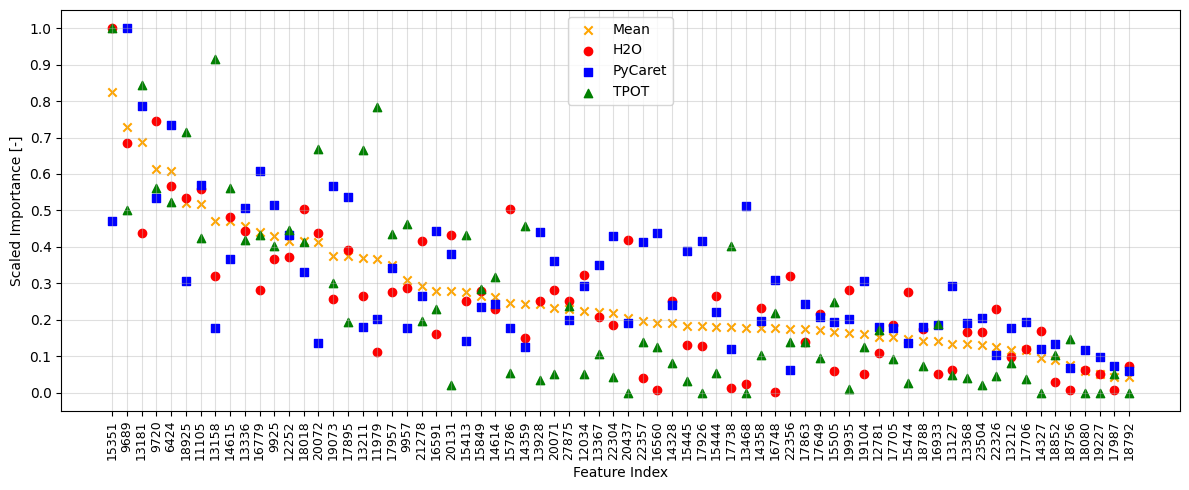

In [4]:
sort_type = "Mean"

# Sort by mean of scaled importance
df_merged = df_merged.sort_values(by=f'Scaled_Importance_{sort_type}', ascending=False)
df_merged = df_merged.reset_index(drop=True)

# horizontal scatterplot with index on the y axis with matplotlib
fig = plt.figure(figsize=(12, 5))
plt.scatter(df_merged.index, df_merged["Scaled_Importance_Mean"], color="orange", marker="x")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_h2o"], color="red", marker="o")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_pycaret"], color="blue", marker="s")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_tpot"], color="green", marker="^")

# rename every single y ticklabel to the corresponding feature name
plt.xticks(df_merged.index, df_merged.Feature, fontsize=9, rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))

# rename the axis ticks to the Feature names
plt.ylabel('Scaled Importance [-]')
plt.xlabel('Feature Index')

plt.legend(labels=['Mean', 'H2O', 'PyCaret', 'TPOT'], loc="upper center")
plt.grid(alpha=0.4)
plt.tight_layout()

# save the graph
plt.savefig(f"../figures/feature_importance_{sort_type}.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

# show the graph
plt.show()

## sorted by tpot

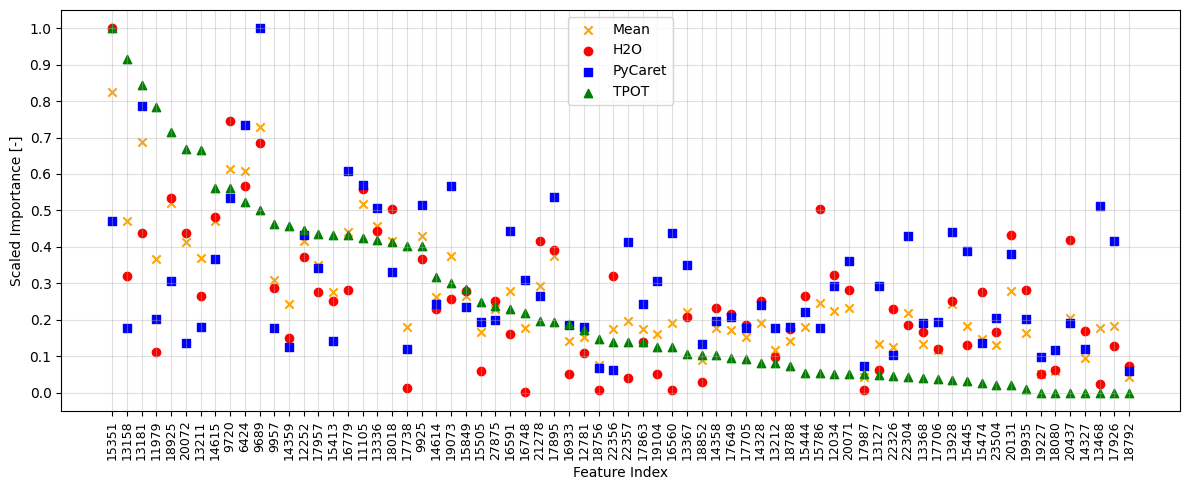

In [5]:
sort_type = "tpot"

# Sort by mean of scaled importance
df_merged = df_merged.sort_values(by=f'Scaled_Importance_{sort_type}', ascending=False)
df_merged = df_merged.reset_index(drop=True)

# horizontal scatterplot with index on the y axis with matplotlib
fig = plt.figure(figsize=(12, 5))
plt.scatter(df_merged.index, df_merged["Scaled_Importance_Mean"], color="orange", marker="x")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_h2o"], color="red", marker="o")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_pycaret"], color="blue", marker="s")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_tpot"], color="green", marker="^")

# rename every single y ticklabel to the corresponding feature name
plt.xticks(df_merged.index, df_merged.Feature, fontsize=9, rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))

# rename the axis ticks to the Feature names
plt.ylabel('Scaled Importance [-]')
plt.xlabel('Feature Index')

plt.legend(labels=['Mean', 'H2O', 'PyCaret', 'TPOT'], loc="upper center")
plt.grid(alpha=0.4)
plt.tight_layout()

# save the graph
plt.savefig(f"../figures/feature_importance_{sort_type}.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

# show the graph
plt.show()

## sorted by h2o

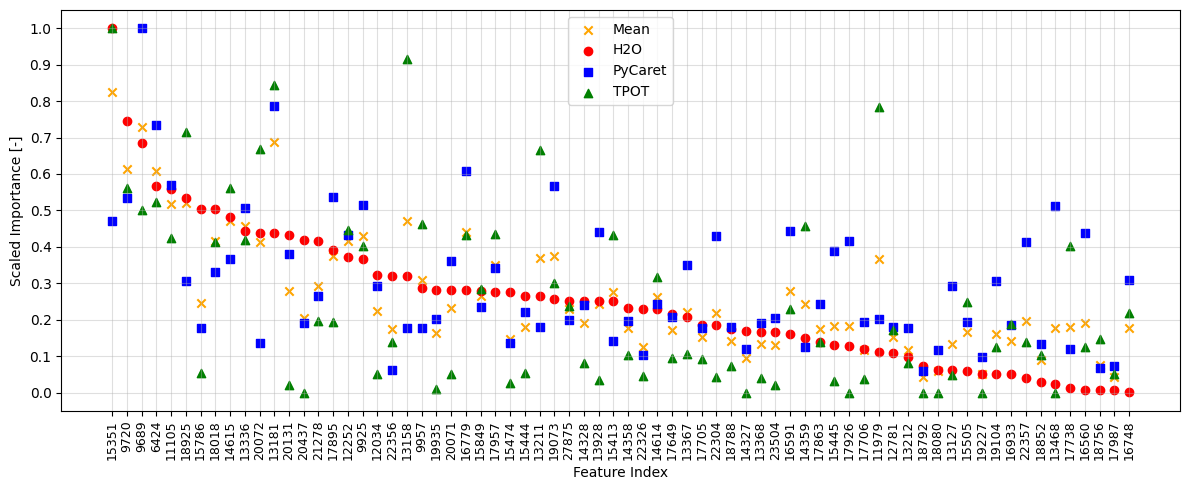

In [6]:
sort_type = "h2o"

# Sort by mean of scaled importance
df_merged = df_merged.sort_values(by=f'Scaled_Importance_{sort_type}', ascending=False)
df_merged = df_merged.reset_index(drop=True)

# horizontal scatterplot with index on the y axis with matplotlib
fig = plt.figure(figsize=(12, 5))
plt.scatter(df_merged.index, df_merged["Scaled_Importance_Mean"], color="orange", marker="x")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_h2o"], color="red", marker="o")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_pycaret"], color="blue", marker="s")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_tpot"], color="green", marker="^")

# rename every single y ticklabel to the corresponding feature name
plt.xticks(df_merged.index, df_merged.Feature, fontsize=9, rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))

# rename the axis ticks to the Feature names
plt.ylabel('Scaled Importance [-]')
plt.xlabel('Feature Index')

plt.legend(labels=['Mean', 'H2O', 'PyCaret', 'TPOT'], loc="upper center")
plt.grid(alpha=0.4)
plt.tight_layout()

# save the graph
plt.savefig(f"../figures/feature_importance_{type}.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

# show the graph
plt.show()

## sorted by pycaret

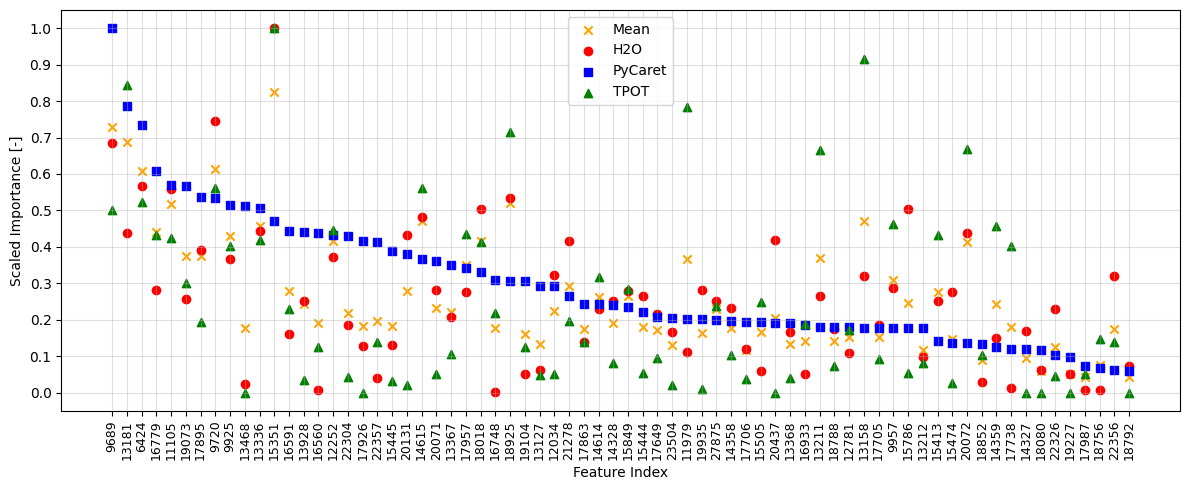

In [7]:
sort_type = "pycaret"

# Sort by mean of scaled importance
df_merged = df_merged.sort_values(by=f'Scaled_Importance_{sort_type}', ascending=False)
df_merged = df_merged.reset_index(drop=True)

# horizontal scatterplot with index on the y axis with matplotlib
fig = plt.figure(figsize=(12, 5))
plt.scatter(df_merged.index, df_merged["Scaled_Importance_Mean"], color="orange", marker="x")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_h2o"], color="red", marker="o")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_pycaret"], color="blue", marker="s")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_tpot"], color="green", marker="^")

# rename every single y ticklabel to the corresponding feature name
plt.xticks(df_merged.index, df_merged.Feature, fontsize=9, rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))

# rename the axis ticks to the Feature names
plt.ylabel('Scaled Importance [-]')
plt.xlabel('Feature Index')

plt.legend(labels=['Mean', 'H2O', 'PyCaret', 'TPOT'], loc="upper center")
plt.grid(alpha=0.4)
plt.tight_layout()

# save the graph
plt.savefig(f"../figures/feature_importance_{sort_type}.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

# show the graph
plt.show()

## sorted by minimum

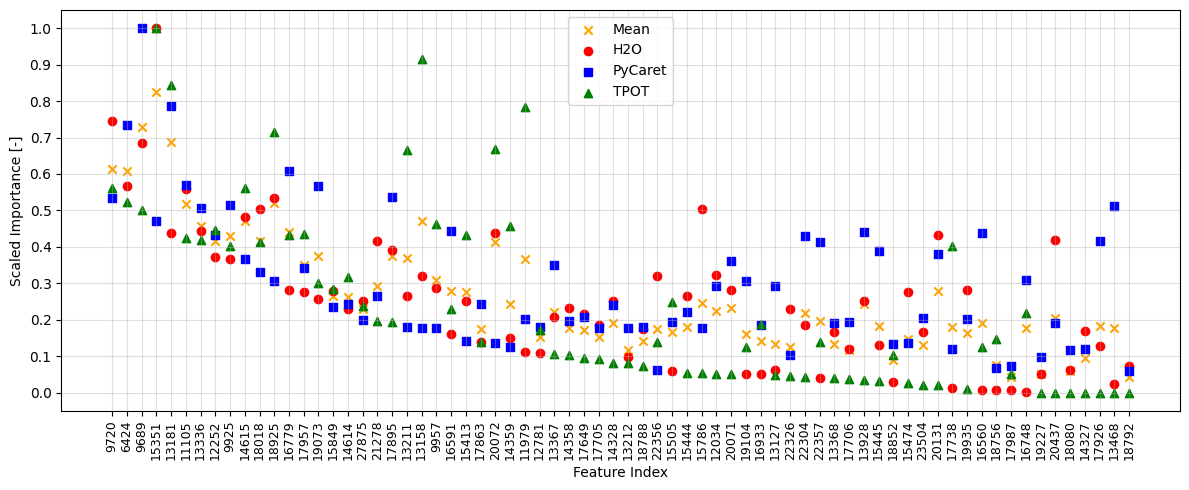

In [8]:
sort_type = "min"

# Sort by the minimum of any scaled importance
df_merged['Scaled_Importance_Min'] = df_merged.loc[:,["Scaled_Importance_h2o", "Scaled_Importance_pycaret", "Scaled_Importance_tpot"]].min(axis=1)
df_merged = df_merged.sort_values(by=f'Scaled_Importance_Min', ascending=False)
df_merged = df_merged.reset_index(drop=True)

# horizontal scatterplot with index on the y axis with matplotlib
fig = plt.figure(figsize=(12, 5))
plt.scatter(df_merged.index, df_merged["Scaled_Importance_Mean"], color="orange", marker="x")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_h2o"], color="red", marker="o")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_pycaret"], color="blue", marker="s")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_tpot"], color="green", marker="^")

# rename every single y ticklabel to the corresponding feature name
plt.xticks(df_merged.index, df_merged.Feature, fontsize=9, rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))

# rename the axis ticks to the Feature names
plt.ylabel('Scaled Importance [-]')
plt.xlabel('Feature Index')

plt.legend(labels=['Mean', 'H2O', 'PyCaret', 'TPOT'], loc="upper center")
plt.grid(alpha=0.4)
plt.tight_layout()

# save the graph
plt.savefig(f"../figures/feature_importance_{sort_type}.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

# show the graph
plt.show()

## sorted by maximum

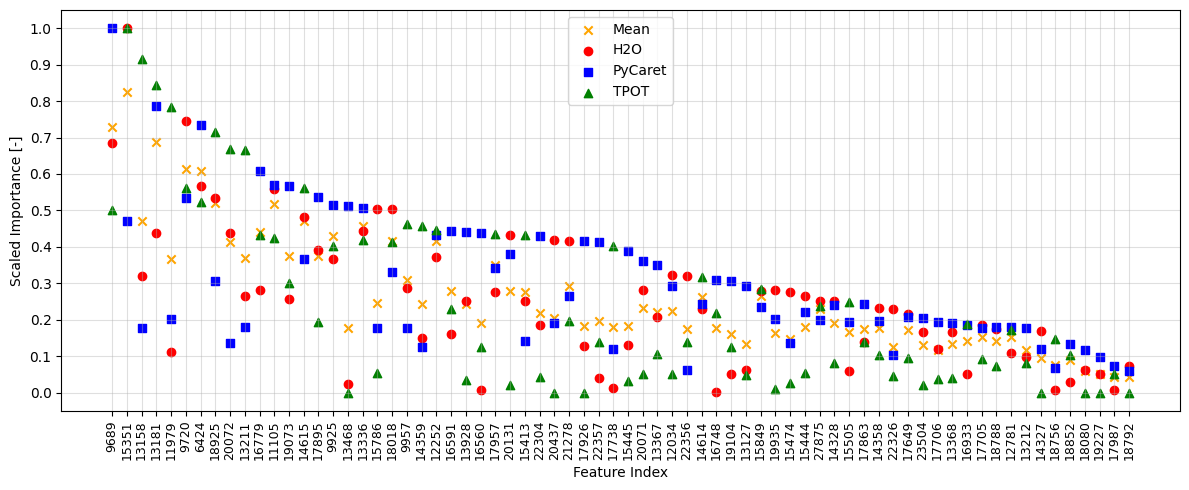

In [9]:
sort_type = "max"

# Sort by the minimum of any scaled importance
df_merged['Scaled_Importance_Min'] = df_merged.loc[:,["Scaled_Importance_h2o", "Scaled_Importance_pycaret", "Scaled_Importance_tpot"]].max(axis=1)
df_merged = df_merged.sort_values(by=f'Scaled_Importance_Min', ascending=False)
df_merged = df_merged.reset_index(drop=True)

# horizontal scatterplot with index on the y axis with matplotlib
fig = plt.figure(figsize=(12, 5))
plt.scatter(df_merged.index, df_merged["Scaled_Importance_Mean"], color="orange", marker="x")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_h2o"], color="red", marker="o")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_pycaret"], color="blue", marker="s")
plt.scatter(df_merged.index, df_merged["Scaled_Importance_tpot"], color="green", marker="^")

# rename every single y ticklabel to the corresponding feature name
plt.xticks(df_merged.index, df_merged.Feature, fontsize=9, rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))

# rename the axis ticks to the Feature names
plt.ylabel('Scaled Importance [-]')
plt.xlabel('Feature Index')

plt.legend(labels=['Mean', 'H2O', 'PyCaret', 'TPOT'], loc="upper center")
plt.grid(alpha=0.4)
plt.tight_layout()

# save the graph
plt.savefig(f"../figures/feature_importance_{sort_type}.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

# show the graph
plt.show()

## Export to NIfTI with feature importance

In [10]:
df_merged.sort_values(by=['Scaled_Importance_Mean'], ascending=False)

,Feature,Scaled_Importance_h2o,Scaled_Importance_pycaret,Scaled_Importance_tpot,Scaled_Importance_Mean,Scaled_Importance_Min
1,15351,1.000000,0.471127,1.000000,0.823709,1.000000
0,9689,0.685253,1.000000,0.499932,0.728395,1.000000
3,13181,0.436983,0.786935,0.843012,0.688976,0.843012
5,9720,0.745813,0.534935,0.560653,0.613800,0.745813
6,6424,0.565678,0.734513,0.524445,0.608212,0.734513
...,...,...,...,...,...,...
64,18756,0.008288,0.068438,0.147108,0.074611,0.147108
66,18080,0.062148,0.117938,0.000000,0.060029,0.117938
67,19227,0.052488,0.098569,0.000000,0.050352,0.098569
68,17987,0.008037,0.072295,0.051904,0.044079,0.072295


In [11]:
index_descending = list(df_merged.sort_values(by=['Scaled_Importance_Mean'], ascending=False).loc[:, "Feature"])
print(type(index_descending))
print(index_descending)

importance_descending = list(df_merged.sort_values(by=['Scaled_Importance_Mean'], ascending=False).loc[:, "Scaled_Importance_Mean"])
print(type(importance_descending))
print(importance_descending)

<class 'list'>
[15351, 9689, 13181, 9720, 6424, 18925, 11105, 13158, 14615, 13336, 16779, 9925, 12252, 18018, 20072, 19073, 17895, 13211, 11979, 17957, 9957, 21278, 16591, 20131, 15413, 15849, 14614, 15786, 14359, 13928, 20071, 27875, 12034, 13367, 22304, 20437, 22357, 16560, 14328, 15445, 17926, 15444, 17738, 13468, 14358, 16748, 22356, 17863, 17649, 15505, 19935, 19104, 12781, 17705, 15474, 18788, 16933, 13127, 13368, 23504, 22326, 13212, 17706, 14327, 18852, 18756, 18080, 19227, 17987, 18792]
<class 'list'>
[0.8237089773341757, 0.7283952676526299, 0.6889764791150329, 0.6138002181696883, 0.6082120565788917, 0.5192760851282602, 0.5176824460375103, 0.4709132755968921, 0.46966153498317703, 0.45717378184708307, 0.44026493465616623, 0.42854335171647034, 0.4166525426181593, 0.41582826207367307, 0.41442937527423146, 0.37504710018116044, 0.37402126215027115, 0.37026136072265686, 0.36613665540298107, 0.35054089202882444, 0.3088000836763452, 0.29232834990000883, 0.278022767825813, 0.2775296673

In [12]:
component = 1
resample_cube = 3
number_of_features = 70
padding = [(1, 1), (1, 1), (1, 1)]
shape_resampled_array = (90, 31, 37, 31)
best_features = index_descending

# create the marker array
marker, marker_array_shape = get_feature_positions(
    top_features=best_features,
    padding=padding,
    resample_cube=resample_cube,
    shape_resampled_array=shape_resampled_array[-3:],
)

# export the feature positions to a NIfTI file
component = component
reshape_cube = resample_cube
number_of_features = number_of_features
output_path = "../NIfTY_feature_masks"
export_feature_positions(
    array_shape=marker_array_shape, 
    marker=marker, 
    output_path=output_path,
    output_filename=f"feature_importance_mean_{reshape_cube}_{number_of_features}",
    feature_importance=importance_descending
)


done with get_feature_positions
saved feature_importance_mean_3_70.nii successfully
